Libraries and Data


In [2]:
import pandas as pd
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

df.shape

df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


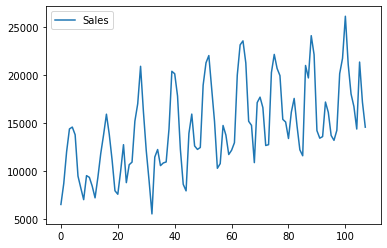

In [3]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

## Building the Model

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12764.127340  15898.395280
1 1968-02-01  14905.955964  13358.677284  16523.379938
2 1968-03-01  20842.150502  19260.158328  22430.329351
3 1968-04-01  22870.095215  21354.564999  24486.967083
4 1968-05-01  24176.211162  22690.158842  25741.318466


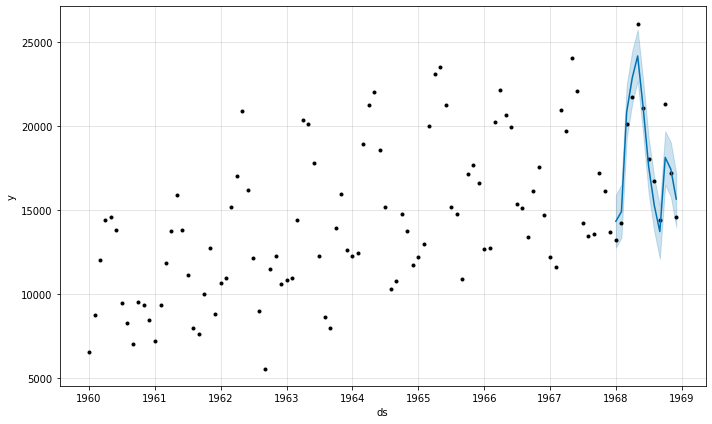

In [4]:
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet

df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




           ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15375.960093  13861.131971  16998.169380
1 1969-02-01  16142.271673  14540.357938  17669.671947
2 1969-03-01  21351.832640  19794.625591  23008.100777
3 1969-04-01  23477.889811  21789.042394  24903.406324
4 1969-05-01  24988.440907  23407.784606  26575.669218


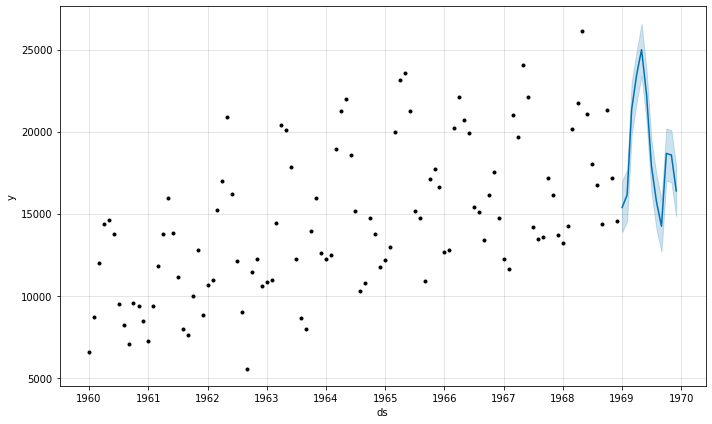

In [6]:
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print('\n\n',forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

## Prediction on Unseen Data

In [7]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [9]:
# calculate MAE between expected and predicted values for december
from sklearn.metrics import mean_absolute_error
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1369.485


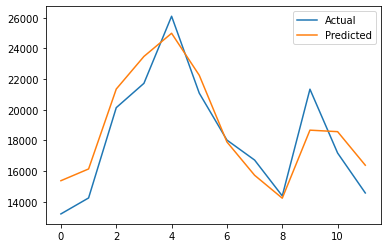

In [10]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()